<a href="https://colab.research.google.com/github/cap-vparekh/DataScience/blob/main/DecisionTree_Classification_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Decision Tree
A Decision Tree is a supervised machine learning algorithm used for both classification and regression tasks.

Imagine you're trying to decide whether to play outside:

Is it raining?

  ├── Yes → Stay inside

  └── No → Is it hot?

             ├── Yes → Go to swimming pool
             └── No → Play outside

This is a decision tree. Each decision (like “Is it raining?”) splits the data and brings you closer to a final outcome.



##Why Use Decision Trees?
* Easy to understand and visualize
* Works for categorical and numerical data
* No need for feature scaling or normalization
* Mimics human decision-making

| Term               | Explanation                                                        |
| ------------------ | ------------------------------------------------------------------ |
| Root Node          | The starting point (first decision)                                |
| Decision Node      | A node that splits into further branches                           |
| Leaf/Terminal Node | Final outcome/prediction                                           |
| Splitting          | Dividing a node into sub-nodes based on a feature                  |
| Pruning            | Removing unnecessary branches to avoid overfitting                 |
| Information Gain   | Measures how well a feature splits the data                        |
| Gini Index         | Alternative to Information Gain; measures impurity                 |
| Entropy            | Measure of disorder; used in calculating information gain          |
| Overfitting        | Tree learns noise instead of patterns; performs poorly on new data |



##How Does a Decision Tree Work? (Step-by-step)
Let’s say we want to predict whether a student will pass an exam based on:
* Study Time (hours)
* Attendance (yes/no)

###Step 1: Choose the Best Feature to Split
We calculate information gain or Gini index for all features.

Let’s say "Study Time" gives better split → make it root.

###Step 2: Split the Data
Split based on conditions like:
* Study Time > 3 hours → likely to pass
* Study Time ≤ 3 hours → check Attendance

###Step 3: Repeat the Process Recursively
For each branch, check the next best feature to split further.

###Step 4: Stop When
* No features are left
* All records belong to the same class
* A maximum depth is reached

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

# 1. Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = pd.Categorical.from_codes(iris.target, iris.target_names)
print(df)


#print(iris.feature_names)
print(iris.target_names)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

        target  
0       se

Accuracy: 0.98
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  1 12]]


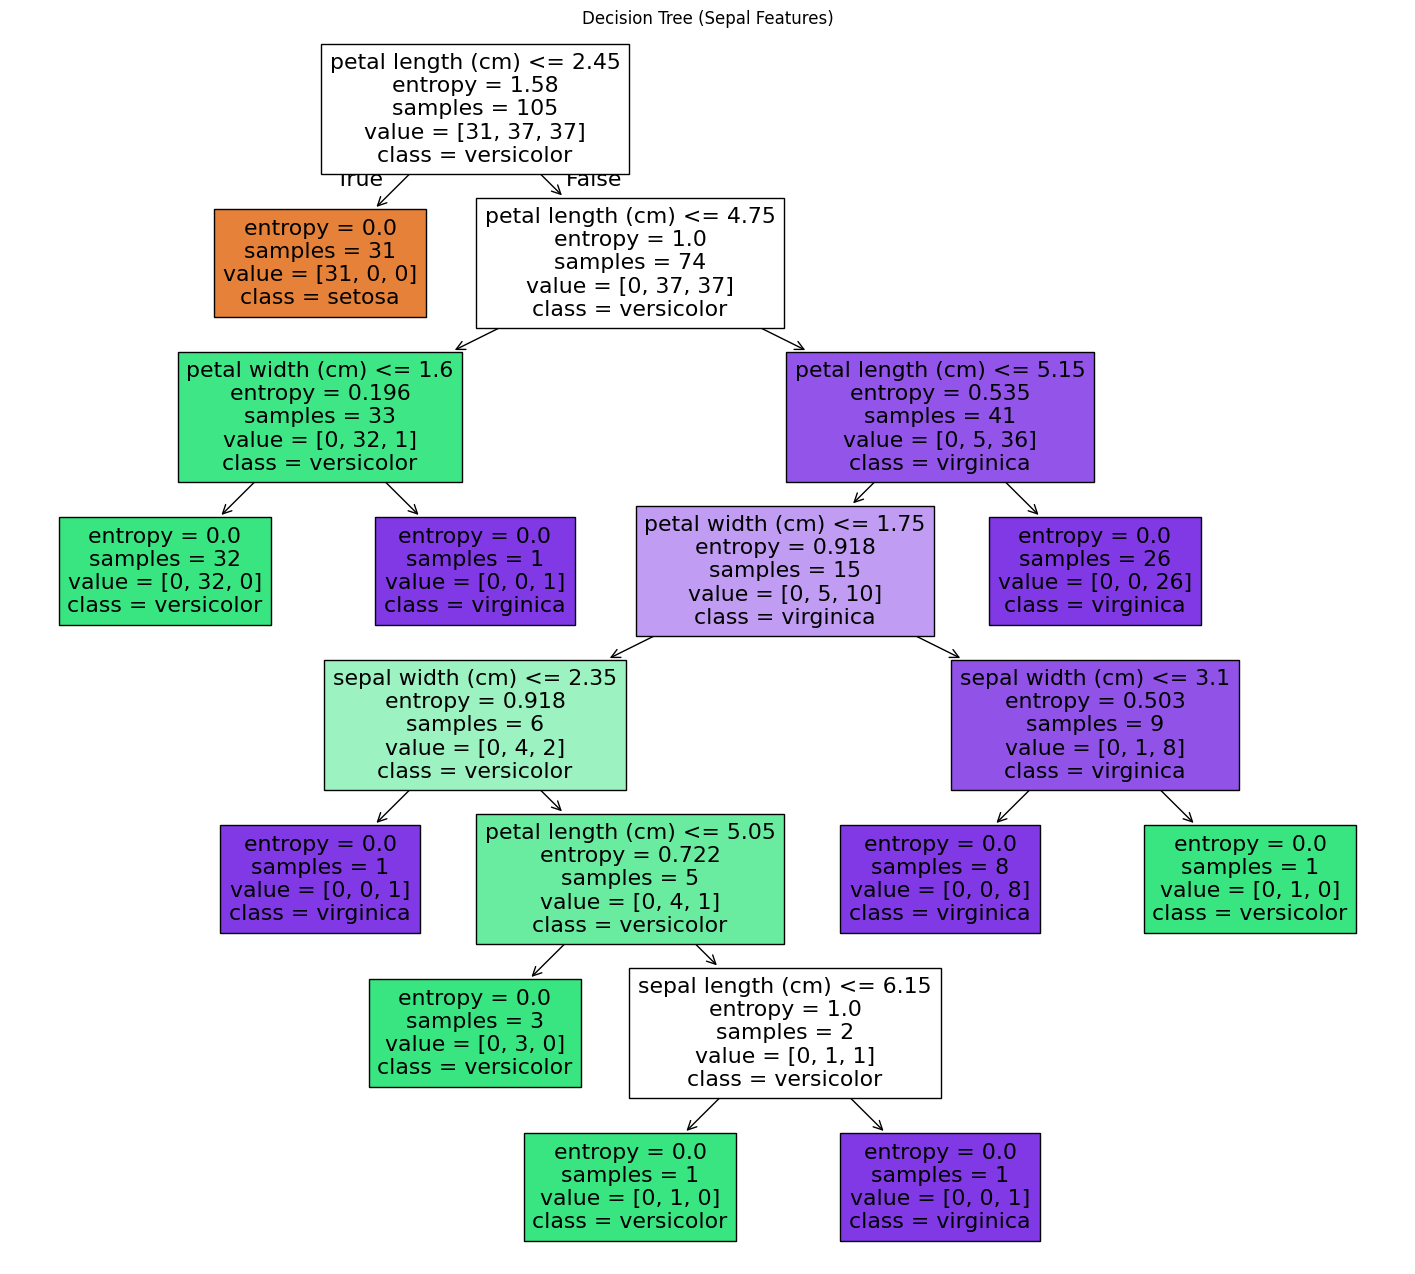

In [ ]:


# 2. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Train a Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
'''entropy is used in calculating information gain
The higher the information gain, the better the feature for splitting.
'''

clf.fit(X_train, y_train)

# 4. Evaluate the model
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc:.2f}")
print("Confusion Matrix:")
print(cm)

# 5. Visualize the Decision Tree
plt.figure(figsize=(18, 16))
plot_tree(
    clf,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True
)
plt.title("Decision Tree (Sepal Features)")
plt.show()


